# Projections de la consommation culturelle patrimoniale

Auteur : [Maximo Rose](https://maximorose.eu/)

Licence : [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

-----------------------------------------------------------

Désolé ce n'est pas des stats concernant Instagram.

C'est juste un fcihier ou je fais des courbes que je trouve jolies avec ces données.

In [2]:
import pandas as pd
filename = 'Univers_historique.csv'
dt_univers = pd.read_csv(filename)

In [3]:
import matplotlib.pyplot as plt

petit_ecran = dt_univers[dt_univers['Univers'] == 'Petit écran']
bain_audiovisuel = dt_univers[dt_univers['Univers'] == 'Bain audiovisuel']
tout_numerique = dt_univers[dt_univers['Univers'] == 'Tout-numérique']
culture_patrimoniale = dt_univers[dt_univers['Univers'] == 'Culture patrimoniale']
eclectisme_classique = dt_univers[dt_univers['Univers'] == 'Eclectisme classique']
eclectisme_augmente = dt_univers[dt_univers['Univers'] == 'Eclectisme augmenté']

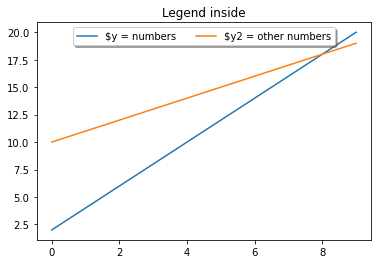

In [4]:
import matplotlib.pyplot as plt
import numpy as np

y = [2,4,6,8,10,12,14,16,18,20]
y2 = [10,11,12,13,14,15,16,17,18,19]
x = np.arange(10)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y, label='$y = numbers')
ax.plot(x, y2, label='$y2 = other numbers')
plt.title('Legend inside')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

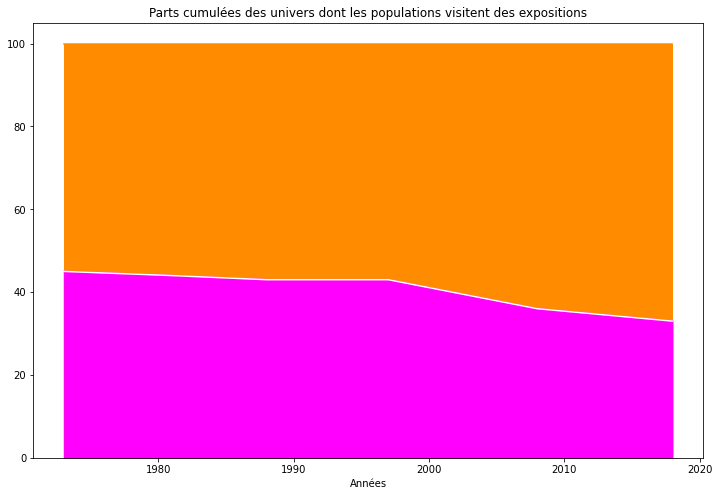

In [42]:
import numpy as np

univers_visiteurs_de_musee = culture_patrimoniale.append(eclectisme_classique).append(eclectisme_augmente)
univers_non_visiteurs_de_musee = petit_ecran.append(bain_audiovisuel).append(tout_numerique)
annees = [1973, 1981, 1988, 1997, 2008, 2018]


somme_visiteur_de_musee_par_annee = []
somme_non_visiteur_de_musee_par_annee = []
for i in range(len(annees)) :
    subdtf_v = univers_visiteurs_de_musee[univers_visiteurs_de_musee['Année'] == annees[i]]
    subdtf_nv = univers_non_visiteurs_de_musee[univers_non_visiteurs_de_musee['Année'] == annees[i]]
    somme_visiteur_de_musee = subdtf_v['Part'].sum()
    somme_non_visiteur_de_musee = subdtf_nv['Part'].sum()
    somme_visiteur_de_musee_par_annee.append(somme_visiteur_de_musee)
    somme_non_visiteur_de_musee_par_annee.append(somme_non_visiteur_de_musee)

d_visiteurs = {'Années':annees,'Parts cumulées':somme_visiteur_de_musee_par_annee}
df_visiteurs = pd.DataFrame(d_visiteurs)

d_non_visiteurs = {'Années':annees,'Parts cumulées':[100, 100, 100, 100, 100, 100]}
df_non_visiteurs = pd.DataFrame(d_non_visiteurs)


fig , axs = plt.subplots(figsize=(12,8))
plt.title('Parts cumulées des univers dont les populations visitent des expositions')
df_non_visiteurs.plot.area(x='Années', y='Parts cumulées', ax = axs, color = '#ff8c00', legend = False)
#ax.legend(loc='upper right', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
df_visiteurs.plot.area(x='Années', y='Parts cumulées', ax = axs, color = '#ff00ff', legend = False)
df_visiteurs.plot(x='Années', y='Parts cumulées', ax = axs, color = 'white', legend = False)
#ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
#plt.yticks(np.arange(110, step=10))
plt.show()



In [29]:
fig , axs = plt.subplots(figsize=(12,8))
plt.title('Parts cumulées des univers dont les populations visitent des expositions')
pl = plt.fill_between(df_non_visiteurs['Années'], df_non_visiteurs['Parts cumulées'], color = '#b9def2', label = "Ne visitent pas des expositions")
plt.legend(pl, ["Ne visitent pas d'expositions"], loc='upper right')
#plt.legend(pl, ["Ne visitent pas d'expositions"], loc='upper right')
plt.yticks(np.arange(110, step=10))
ax2 = plt.gca().twinx()
#pl2 = ax2.plot(df_visiteurs['Années'], df_visiteurs['Parts cumulées'], color = '#258e70')
pl2 = ax2.fill_between(df_visiteurs['Années'], df_visiteurs['Parts cumulées'], color = '#258e70')
#plt.legend(pl2, ["Visitent des expositions"], loc='lower left')
plt.yticks(np.arange(110, step=10))
plt.show()

TypeError: 'PolyCollection' object is not iterable

In [4]:
print("Part de visiteurs potentiels de musée en 1973 : " + str(somme_visiteur_de_musee_par_annee[0])+'%')
print("Part de visiteurs potentiels de musée en 2018 : " + str(somme_visiteur_de_musee_par_annee[-1])+'%')

Part de visiteurs potentiels de musée en 1973 : 45%
Part de visiteurs potentiels de musée en 2018 : 33%


In [5]:
taux_de_perte_de_points = (somme_visiteur_de_musee_par_annee[0] - somme_visiteur_de_musee_par_annee[-1]) / somme_visiteur_de_musee_par_annee[0]
print ("taux de perte = " + str(taux_de_perte_de_points*100) +"%")

taux de perte = 26.666666666666668%


### Bilan

La part de public potentiellement amené à visiter une exposition décroît au fil du temps. Elle a perdu 12 points en 50 ans, soit une baisse de plus d'1/4 (26.7%).

La décroissance la plus forte a eu lieu entre 1998 et 2008. Comme si un virage était mal négocié ;)

## Projection

Considérons maintenant les tendances à la croissance ou à la décroissance des univers, pour estimer des projections à venir de leur part actuelle.

Imaginons la perspective où l'évolution de 2008 à 2018, largement impactée par le développement de l'industrie numérique, du big data, et des algorithmes prédictifs personnalisés, perdure : les univers en croissance continuent de croitre aux mêmes rythme, et ceux en décroissance suivent leur pente.

In [8]:
Part2008_petit_ecran = petit_ecran[petit_ecran['Année'] == 2008]['Part'].values[0]
Part2018_petit_ecran = petit_ecran[petit_ecran['Année'] == 2018]['Part'].values[0]
variation_petit_ecran = (Part2018_petit_ecran - Part2008_petit_ecran)/Part2008_petit_ecran
projection_2028_petit_ecran = Part2018_petit_ecran + variation_petit_ecran*Part2018_petit_ecran
print ("Petit écran en 2008 : " + str(Part2008_petit_ecran))
print ("Petit écran en 2018 : " + str(Part2018_petit_ecran))
print("Petit écran en 2028 : " + str(projection_2028_petit_ecran))
print()


Part2008_bain_audiovisuel = bain_audiovisuel[bain_audiovisuel['Année'] == 2008]['Part'].values[0]
Part2018_bain_audiovisuel = bain_audiovisuel[bain_audiovisuel['Année'] == 2018]['Part'].values[0]
variation_bain_audiovisuel = (Part2018_bain_audiovisuel - Part2008_bain_audiovisuel)/Part2008_bain_audiovisuel
projection_2028_bain_audiovisuel = Part2018_bain_audiovisuel + variation_bain_audiovisuel*Part2018_bain_audiovisuel
print ("Bain audiovisuel en 2008 : " + str(Part2008_bain_audiovisuel))
print ("Bain audiovisuel en 2018 : " + str(Part2018_bain_audiovisuel))
print("Bain audiovisuel en 2028 : " + str(projection_2028_bain_audiovisuel))
print()

Part2008_tout_numerique = tout_numerique[tout_numerique['Année'] == 2008]['Part'].values[0]
Part2018_tout_numerique = tout_numerique[tout_numerique['Année'] == 2018]['Part'].values[0]
variation_tout_numerique = (Part2018_tout_numerique - Part2008_tout_numerique)/Part2008_tout_numerique
projection_2028_tout_numerique = Part2018_tout_numerique + variation_tout_numerique*Part2018_tout_numerique
print ("Tout numérique en 2008 : " + str(Part2008_tout_numerique))
print ("Tout numérique en 2018 : " + str(Part2018_tout_numerique))
print("Tout numérique en 2028 : " + str(projection_2028_tout_numerique))
print()


Part2008_culture_patrimoniale = culture_patrimoniale[culture_patrimoniale['Année'] == 2008]['Part'].values[0]
Part2018_culture_patrimoniale = culture_patrimoniale[culture_patrimoniale['Année'] == 2018]['Part'].values[0]
variation_culture_patrimoniale = (Part2018_culture_patrimoniale - Part2008_culture_patrimoniale)/Part2008_culture_patrimoniale
projection_2028_culture_patrimoniale = Part2018_culture_patrimoniale + variation_culture_patrimoniale*Part2018_culture_patrimoniale
print ("Culture Patrimoniale en 2008 : " + str(Part2008_culture_patrimoniale))
print ("Culture Patrimoniale en 2018 : " + str(Part2018_culture_patrimoniale))
print("Culture Patrimoniale en 2028 : " + str(projection_2028_culture_patrimoniale))
print()

Part2008_eclectisme_classique = eclectisme_classique[eclectisme_classique['Année'] == 2008]['Part'].values[0]
Part2018_eclectisme_classique = eclectisme_classique[eclectisme_classique['Année'] == 2018]['Part'].values[0]
variation_eclectisme_classique = (Part2018_eclectisme_classique - Part2008_eclectisme_classique)/Part2008_eclectisme_classique
projection_2028_eclectisme_classique = Part2018_eclectisme_classique + variation_eclectisme_classique*Part2018_eclectisme_classique
print ("Eclectisme classique en 2008 : " + str(Part2008_eclectisme_classique))
print ("Eclectisme classique en 2018 : " + str(Part2018_eclectisme_classique))
print("Eclectisme classique en 2028 : " + str(projection_2028_eclectisme_classique))
print()


Part2008_eclectisme_augmente = eclectisme_augmente[eclectisme_augmente['Année'] == 2008]['Part'].values[0]
Part2018_eclectisme_augmente = eclectisme_augmente[eclectisme_augmente['Année'] == 2018]['Part'].values[0]
variation_eclectisme_augmente = (Part2018_eclectisme_augmente - Part2008_eclectisme_augmente)/Part2008_eclectisme_augmente
projection_2028_eclectisme_augmente = Part2018_eclectisme_augmente + variation_eclectisme_augmente*Part2018_eclectisme_augmente
print ("Eclectisme augmenté en 2008 : " + str(Part2008_eclectisme_augmente))
print ("Eclectisme augmenté en 2018 : " + str(Part2018_eclectisme_augmente))
print("Eclectisme augmenté en 2028 : " + str(projection_2028_eclectisme_augmente))
print()

Petit écran en 2008 : 45
Petit écran en 2018 : 30
Petit écran en 2028 : 20.0

Bain audiovisuel en 2008 : 18
Bain audiovisuel en 2018 : 22
Bain audiovisuel en 2028 : 26.88888888888889

Tout numérique en 2008 : 1
Tout numérique en 2018 : 15
Tout numérique en 2028 : 225.0

Culture Patrimoniale en 2008 : 23
Culture Patrimoniale en 2018 : 15
Culture Patrimoniale en 2028 : 9.782608695652174

Eclectisme classique en 2008 : 12
Eclectisme classique en 2018 : 9
Eclectisme classique en 2028 : 6.75

Eclectisme augmenté en 2008 : 1
Eclectisme augmenté en 2018 : 9
Eclectisme augmenté en 2028 : 81.0



### Problème 

Deux valeurs projetées posent problème : celle du "tout numérique" et celle de "l'éclectisme augmenté". Leur croissance a été si forte entre 2008 et 2018 que si elle perdurait, la part du tout-numérique serait de 225%...

Pour s'offrir une estimation facile, pas trop déconnante, on répartira simplement la part restante des autres univers projetés entre ces deux univers là. Et cette répartition sera fonction de leur rapport actuel.

In [9]:
rapport_univers_numerique = Part2018_tout_numerique/Part2018_eclectisme_augmente
print("Rapport entre les parts des univers 'tout-numérique' et 'éclectisme augmentée' " + str(rapport_univers_numerique))

Rapport entre les parts des univers 'tout-numérique' et 'éclectisme augmentée' 1.6666666666666667


En 2018, la part du "tout-numérique" est 1.67 fois plus grande que celle de l'éclectisme augmenté.

Si ce rapport était maintenu et que ces deux univers se partageaint la part de public restante, une fois otée la part des autres univers à la totalité, on pourrait imaginer les projections suivantes :

In [11]:
reste = 100 - (projection_2028_petit_ecran + projection_2028_bain_audiovisuel + projection_2028_culture_patrimoniale + projection_2028_eclectisme_classique)
# J'ai posé l'équation sur le papier, j'avoue.
Part2028_eclectisme_augmente = reste / (1 + rapport_univers_numerique)
print("Part d'éclectisme augmenté en 2028 : " + str(Part2028_eclectisme_augmente))
Part2028_tout_numerique = reste - Part2028_eclectisme_augmente
print("Part de tout-numérique en 2028 : " + str(Part2028_tout_numerique))

Part d'éclectisme augmenté en 2028 : 13.716938405797102
Part de tout-numérique en 2028 : 22.86156400966184


__N.B :__ Selon moi ce sont de sprojections plutot positives. Je pense qu'il est plus facile de se faire happer par le tout numérique car c'ets une pratique qui nécessite plus de passivité, alors que l'eclectisme augmenté nécessite plus de pratiques actives.

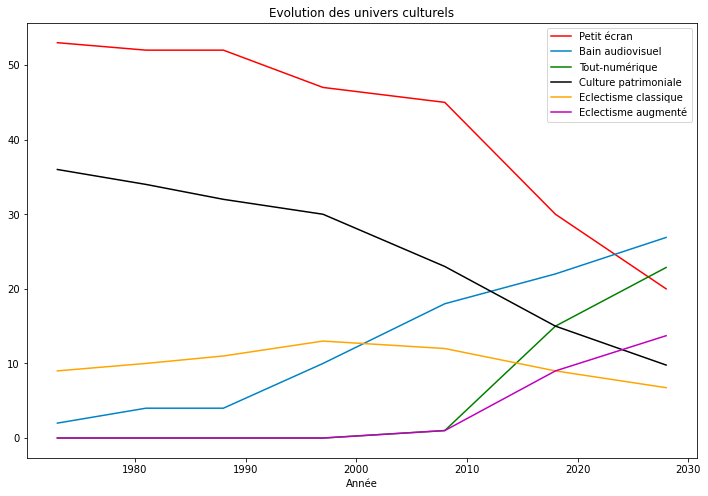

In [14]:
dpe = {'Univers' : ["Petit écran"], 'Année': [2028], 'Part' : [projection_2028_petit_ecran]}
df_pe = pd.DataFrame(dpe)
petit_ecran = petit_ecran.append(df_pe)

dba = {'Univers' : ["Bain audiovisuel"], 'Année': [2028], 'Part' : [projection_2028_bain_audiovisuel]}
df_ba = pd.DataFrame(dba)
bain_audiovisuel = bain_audiovisuel.append(df_ba)

dtn = {'Univers' : ["Tout-numérique"], 'Année': [2028], 'Part' : [Part2028_tout_numerique]}
df_tn = pd.DataFrame(dtn)
tout_numerique = tout_numerique.append(df_tn)

dcp = {'Univers' : ["Culture patrimoniale"], 'Année': [2028], 'Part' : [projection_2028_culture_patrimoniale]}
df_cp = pd.DataFrame(dcp)
culture_patrimoniale = culture_patrimoniale.append(df_cp)

dec = {'Univers' : ["Eclectisme classique"], 'Année': [2028], 'Part' : [projection_2028_eclectisme_classique]}
df_ec = pd.DataFrame(dec)
eclectisme_classique = eclectisme_classique.append(df_ec)

dea = {'Univers' : ["Eclectisme augmenté"], 'Année': [2028], 'Part' : [Part2028_eclectisme_augmente]}
df_ea = pd.DataFrame(dea)
eclectisme_augmente = eclectisme_augmente.append(df_ea)

fig , axs = plt.subplots(figsize=(12,8))
# Titre
plt.title("Evolution des univers culturels")
petit_ecran.plot(x='Année', y='Part', ax = axs, color = 'red', label = 'Petit écran' )
bain_audiovisuel.plot(x='Année', y='Part', ax = axs, color = '#0083c6', label = 'Bain audiovisuel')
tout_numerique.plot(x='Année', y='Part', ax = axs, color = 'green', label = 'Tout-numérique')
culture_patrimoniale.plot(x='Année', y='Part', ax = axs, color = 'black', label = 'Culture patrimoniale')
eclectisme_classique.plot(x='Année', y='Part', ax = axs, color = 'orange', label = 'Eclectisme classique')
eclectisme_augmente.plot(x='Année', y='Part', ax = axs, color = 'm', label = 'Eclectisme augmenté')
plt.show()

In [17]:
print("Part de visiteur potentiels des musées en 2028 : " +  str(int(projection_2028_eclectisme_classique+projection_2028_culture_patrimoniale+Part2028_eclectisme_augmente))+"% \nContre "+str(somme_visiteur_de_musee_par_annee[-1])+'% en 2018. La baisse continue.')

Part de visiteur potentiels des musées en 2028 : 30% 
Contre 33% en 2018. La baisse continue.


# Bilan :

Si rien n'arrive pour enrayer ce phénomène, la culture patrimoniale risque de perdre encore 3 points de prospects parmi la population française.

L'univers "Culture Patrimoniale" est d'ailleurs voué" à disparaître selon l'enquête du DEPS, sa population, en vieillissant, adhèrant finalement à un autre univers.

Il est capital de trouver un moyen de capter des publics éloignés pour inverser cette tendance à la décroissance de la part de français qui visite des expositions.